<a href="https://colab.research.google.com/github/aydawudu/GCP/blob/main/Linear_reg_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Linear Regression 



## Learning Objectives

1. Analyze a Pandas Dataframe.
2. Create Seaborn plots for Exploratory Data Analysis.
3. Train a Linear Regression Model using Scikit-Learn.


## Introduction 
This lab is an introduction to linear regression using Python and Scikit-Learn.  This lab serves as a foundation for more complex algorithms and machine learning models that you will encounter in the course. We will train a linear regression model to predict housing price.

Each learning objective will correspond to a __#TODO__ in this student lab notebook -- try to complete this notebook first and then review the [solution notebook](../solutions/intro_linear_regression.ipynb).

### Import Libraries

In [7]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a Python data visualization library based on matplotlib. 
%matplotlib inline   

###  Load the Dataset

We will use the [USA housing prices](https://www.kaggle.com/kanths028/usa-housing) dataset found on Kaggle.  The data contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

Next, we read the dataset into a Pandas dataframe.

In [8]:
df_USAhousing = pd.read_csv('/content/USA_Housing_toy.csv')

In [9]:
# Show the first five row.

df_USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


Let's check for any null values.

In [10]:
# The isnull() method is used to check and manage NULL values in a data frame.
df_USAhousing.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [11]:
# Pandas describe() is used to view some basic statistical details of a data frame or a series of numeric values.
df_USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2.500000e+03
mean,68593.117818,5.980941,7.005079,3.989816,36032.881352,1.233117e+06
std,10696.969146,1.007664,1.002411,1.241848,9803.908974,3.547254e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,3.114052e+04
25%,61461.357480,5.328918,6.311252,3.150000,29381.948903,9.937032e+05
50%,68709.189825,5.981525,7.024682,4.050000,36073.859200,1.235056e+06
75%,75868.888025,6.680616,7.687694,4.500000,42683.564510,1.467923e+06
max,107701.748400,8.991399,10.759588,6.500000,69592.040240,2.469066e+06


In [12]:
# Pandas info() function is used to get a concise summary of the dataframe.
df_USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              2500 non-null   float64
 1   Avg. Area House Age           2500 non-null   float64
 2   Avg. Area Number of Rooms     2500 non-null   float64
 3   Avg. Area Number of Bedrooms  2500 non-null   float64
 4   Area Population               2500 non-null   float64
 5   Price                         2500 non-null   float64
 6   Address                       2500 non-null   object 
dtypes: float64(6), object(1)
memory usage: 136.8+ KB


Let's take a peek at the first and last five rows of the data for all columns.

**Lab Task 1:** Print the first and last five rows of the data for all columns.

In [13]:
# TODO 1 -- your code goes here
df_USAhousing.head(5)
df_USAhousing.tail(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
2495,70213.64600,5.913557,5.829801,3.26,34386.42978,1.064570e+06,8578 Michele Squares Apt. 349\nEast Bobbychest...
2496,48640.10361,3.664294,8.609398,4.07,33381.23866,6.072494e+05,"4600 Tara Meadow Suite 656\nFernandoport, MP 4..."
2497,64534.46591,3.883364,7.382973,4.22,52933.67258,1.202228e+06,"129 Webb Ports Apt. 539\nShortland, SD 64926-8296"
2498,58337.23049,5.233592,5.683635,2.18,38235.03310,8.168135e+05,"021 Carroll Unions\nMarthaborough, KS 52821-2523"
2499,78845.76218,6.200076,5.645544,2.30,54845.49441,1.598159e+06,"92450 Aguilar Knolls Apt. 965\nAustinburgh, OH..."


## Exploratory Data Analysis (EDA)

Let's create some simple plots to check out the data!  

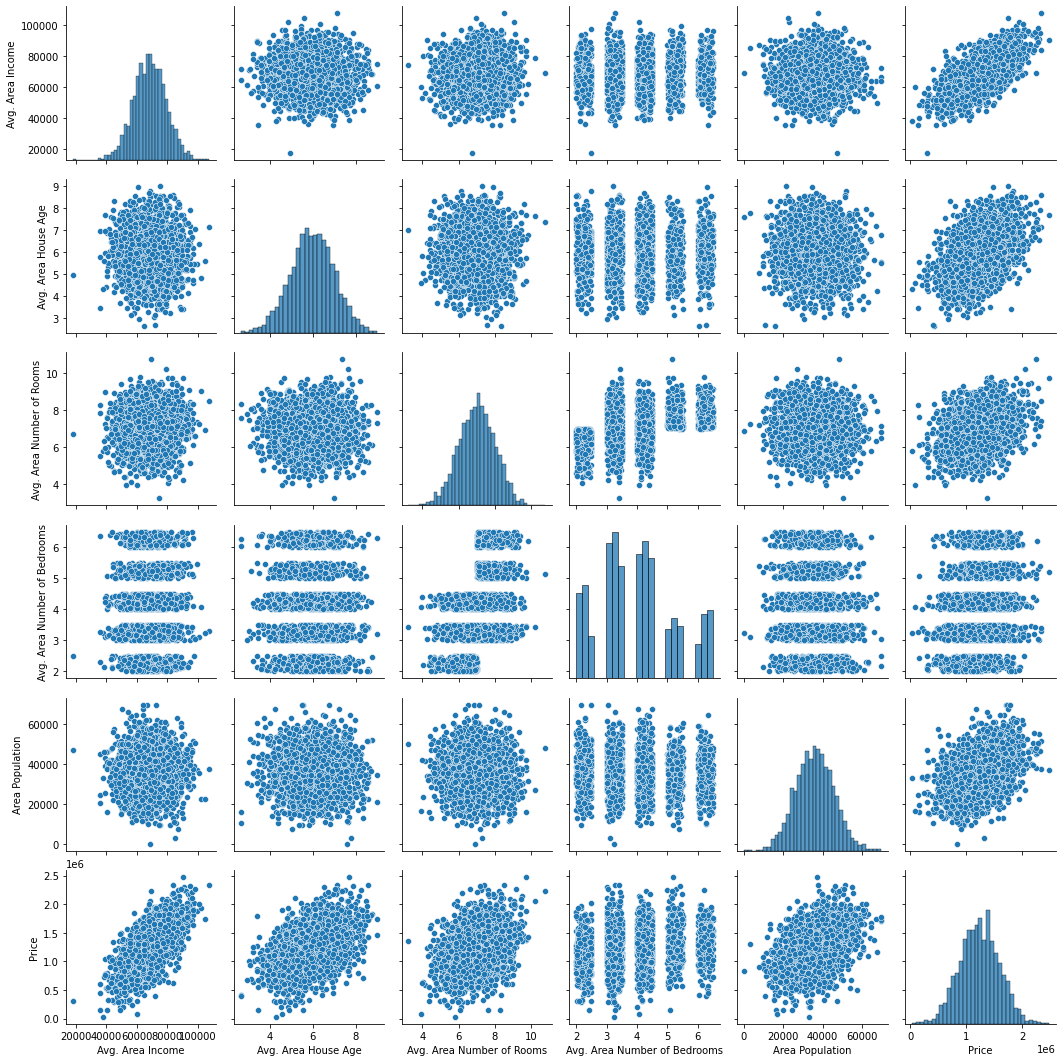

In [14]:
sns.pairplot(df_USAhousing)

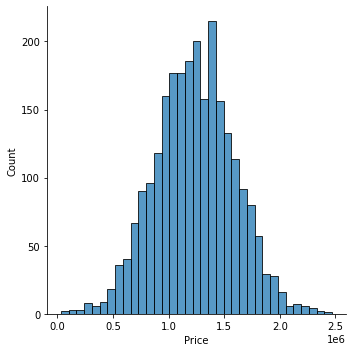

In [15]:
sns.displot(df_USAhousing['Price'])

**Lab Task 2:** Create the plots using heatmap():

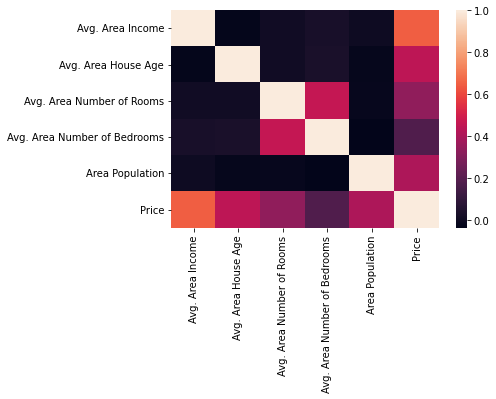

In [24]:
# TODO 2 -- your code goes here
sns.heatmap(df_USAhousing.corr());

## Training a Linear Regression Model

Regression is a supervised machine learning process.  It is similar to classification, but rather than predicting a label, we try to predict a continuous value.   Linear regression defines the relationship between a target variable (y) and a set of predictive features (x).  Simply stated, If you need to predict a number, then use regression. 

Let's now begin to train our regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

Next, let's define the features and label.  Briefly, feature is input; label is output. This applies to both classification and regression problems.

In [17]:
X = df_USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = df_USAhousing['Price']

## Train - Test - Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.  Note that we are using 40% of the data for testing.  

#### What is Random State? 
If an integer for random state is not specified in the code, then every time the code is executed, a new random value is generated and the train and test datasets will have different values each time.  However, if a fixed value is assigned -- like random_state = 0 or 1 or 101 or any other integer, then no matter how many times you execute your code the result would be the same, e.g. the same values will be in the train and test datasets.  Thus, the random state that you provide is used as a seed to the random number generator. This ensures that the random numbers are generated in the same order. 

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Creating and Training the Model

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lm = LinearRegression()

**Lab Task 3:** Training the Model using fit():

In [25]:
# TODO 3 -- your code goes here
lm.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [26]:
# print the intercept
print(lm.intercept_)

-2609837.641456213


In [27]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.631226
Avg. Area House Age,164685.174384
Avg. Area Number of Rooms,116858.596405
Avg. Area Number of Bedrooms,2119.114963
Area Population,15.111985


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.52 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$164883.28 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$122368.67 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$2233.80 **.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.15 **.



## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [28]:
predictions = lm.predict(X_test)

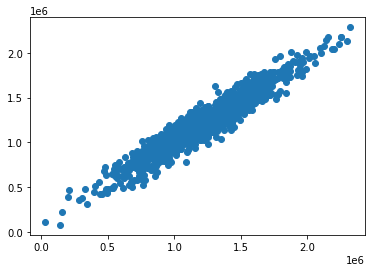

In [29]:
plt.scatter(y_test,predictions)

**Residual Histogram**

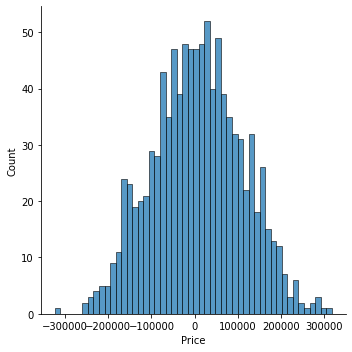

In [30]:
sns.displot((y_test-predictions),bins=50);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [31]:
from sklearn import metrics

In [32]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 84590.3252528809
MSE: 10939833271.005766
RMSE: 104593.65789093412


Copyright 2021 Google Inc.  Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at
http://www.apache.org/licenses/LICENSE-2.0
Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.